# CNN kullanarak Parmak Hesabı Yapmak

In [65]:
import matplotlib.pyplot as plt
import numpy as np 
import cv2
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
import os,glob
import time

18.000 train ve 3.600 test img var . Imglerin her biri 128x128 boyutunda

In [66]:
trainPath = "Resources/train/*.png"
testPath = "Resources/test/*.png"

train_img_list = glob.glob(trainPath)
test_img_list = glob.glob(testPath)

print("Train Data Size :" ,len(train_img_list))
print("Test Data Size : ",len(test_img_list))

Train Data Size : 18000
Test Data Size :  3600


Resimlerin isimlerinin son kısımında hangi elde kaç parmak oldugu yazıyor.

In [67]:
print(train_img_list[0].split("_")[1][0])
print(train_img_list[1].split("_")[1][0])
print(train_img_list[2].split("_")[1][0])

0
0
2


In [88]:
#tic = time.time()
x_train = np.zeros((18000,128,128),np.float32)
x_test = np.zeros((3600,128,128),np.float32)
y_test = np.zeros((3600),np.uint8)
y_train = np.zeros((18000),np.uint8)
for i in range(0,18000):
    img = cv2.imread(train_img_list[i],0)
    x_train[i] = img
    y_train[i] = train_img_list[i].split("_")[1][0] 
    if(i<3600):
        img = cv2.imread(test_img_list[i],0)
        x_test[i]=img
        y_test[i] = test_img_list[i].split("_")[1][0]
toc = time.time()

#print("Time : " ,str((toc-tic)*1000)+"ms")

### Elde ettiğimiz datalardan birisini inceleyelim.

Train Data Size : 18000
Test Data Size :  3600


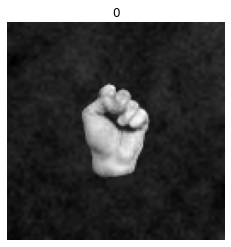

Image Shape:  (128, 128)


In [89]:
print("Train Data Size :" ,x_train.shape[0])
print("Test Data Size : ",x_test.shape[0])
plt.figure(),plt.imshow(x_train[0],cmap="gray"),plt.axis("off"),plt.title(y_train[0]),plt.show()
print("Image Shape: ",x_train[0].shape)

Şimdi elde ettiğimiz y (label) değerlerini düzenleyelim.

In [90]:
y_train = to_categorical(y_train)

x_train = x_train.reshape(18000,128,128,1)  
x_test = x_test.reshape(3600,128,128,1)   


### CNN yapımızı oluşturalım

In [91]:
model = tf.keras.models.Sequential()
model.add(Conv2D(input_shape = (128,128,1), filters = 8, kernel_size = (5,5), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D( filters = 16, kernel_size = (3,3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=256, activation = "relu" ))
model.add(Dropout(0.2))
model.add(Dense(units=6, activation = "softmax" ))


model.compile(loss = "categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

In [93]:
model.fit(x_train,y_train,epochs=2)

Epoch 1/2
563/563 [==============================] - 67s 120ms/step - loss: 0.0150 - accuracy: 0.9964
Epoch 2/2
563/563 [==============================] - 68s 121ms/step - loss: 0.0108 - accuracy: 0.9969


In [94]:
result = model.predict(x_test)

 ### Elde ettiğimiz tahmin değerlerini test edelim.

In [100]:
x = 0
for i in range(len(result)):
    if(np.argmax(result[i])==y_test[i]):
        x+=1
    else : 
        print("Hatalı Değer : ",str(i))
print("Doğruluk Yuzdesi : " ,str((x/len(result))*100))

Hatalı Değer :  1988
Doğruluk Yuzdesi :  99.97222222222221


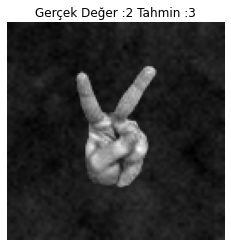

In [107]:
plt.figure(),plt.imshow(x_test[1988],cmap="gray"),plt.axis("off")
plt.title("Gerçek Değer :"+str( y_test[1988])+" Tahmin :"+str(np.argmax(result[1988])))
plt.show()